In [565]:
library(ggplot2)
library(cowplot)

In [566]:
## MOFA (pv2)
x = c(8.465845e-10,  2.912894e-02, 3.468064e-10,  0.005462, 0.348159, 0.092094, 0.018068, 0.202231, 0.375638, 0.720105, 0.471773, 
     3.969373e-13, 5.576247e-13, 0.208862, 0.656033, 0.353284, 0.006725, 0.888190, 0.000003, 0.011491, 1.328878e-11, 6.727592e-12,
     0.436182, 0.686520, 2.398976e-17,  1.300539e-11, 3.080535e-10, 3.930914e-09, 0.318595, 0.057419, 0.011458, 0.914385, 0.971026, 0.057087,
     0.038254, 0.000005, 0.419376, 0.145234, 0.25096)
## PCA same settings (pv1)
y0 = c(3.925165e-08, 1.479959e-01, 0.000002, 0.000013, 0.506967, 0.623026, 0.573080, 0.617558, 0.010549, 0.063797,  0.737298, 
      4.305688e-08, 4.265852e-08,  0.496111, 0.113183, 0.770560, 0.006461, 0.843212, 0.000083, 0.790454, 0.371885, 0.000005,
      0.002163, 0.000973, 0.002189, 2.790155e-01, 1.607384e-05, 7.375778e-07, 0.167699, 0.076387, 0.016253, 0.151978, 0.399287, 0.000248,
      0.060604, 0.001412, 0.027694, 3.246701e-13, 0.235666)
## PCA new settings (pv3)
y1 = c(2.621800e-09, 1.523839e-01, 7.361991e-07, 0.000091,  0.150256, 0.208150, 0.071290,  0.103972, 0.594653, 0.873261, 0.880462, 
    5.975197e-11, 6.204527e-11, 0.073163, 0.522266, 0.157959, 0.000009, 0.771356,  0.000026, 0.015247, 0.000002,  0.000001,
      0.068251, 0.344028, 1.544407e-11, 5.245872e-07, 7.264206e-06, 1.030548e-07, 0.032324, 0.660564, 0.026923, 0.761398, 0.941789, 0.027940,
      0.138652, 0.000231, 0.123492, 0.212339, 0.099479)

In [567]:
df_plot = data.frame(x=x, y0=y0)
df_plot = data.frame(x=x, y0=y0, y1=y1)

In [568]:
cor.test(x,y0)
cor.test(-log10(x),-log10(y0))


	Pearson's product-moment correlation

data:  x and y0
t = 1.6918, df = 37, p-value = 0.09909
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05195239  0.53798969
sample estimates:
     cor 
0.267957 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y0)
t = 3.1839, df = 37, p-value = 0.002945
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1736299 0.6797926
sample estimates:
      cor 
0.4637417 


In [569]:
cor.test(x,y1)
cor.test(-log10(x),-log10(y1))


	Pearson's product-moment correlation

data:  x and y1
t = 8.5192, df = 37, p-value = 2.991e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6704945 0.8986121
sample estimates:
      cor 
0.8138414 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y1)
t = 17.506, df = 37, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8961761 0.9707860
sample estimates:
      cor 
0.9445993 


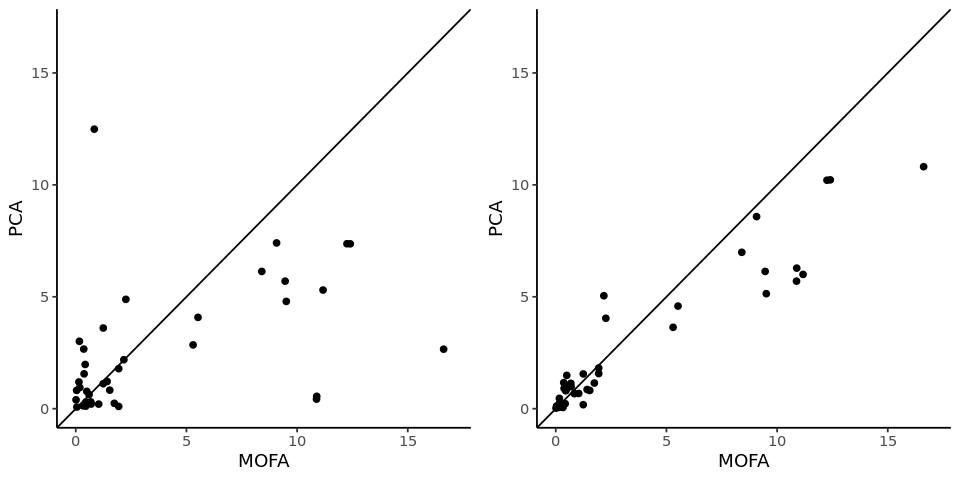

In [570]:
options(repr.plot.width = 8, repr.plot.height = 4)
p0 = ggplot(df_plot, aes(x=-log10(x), y=-log10(y0))) + geom_point() + theme_classic() + geom_abline()
p0 = p0 + xlab("MOFA") + ylab("PCA") + xlim(c(0,17)) + ylim(c(0,17))
p1 = ggplot(df_plot, aes(x=-log10(x), y=-log10(y1))) + geom_point() + theme_classic() + geom_abline()
p1 = p1 + xlab("MOFA") + ylab("PCA") + xlim(c(0,17)) + ylim(c(0,17))
plot_grid(p0,p1,ncol=2)

In [571]:
endo_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/"

In [572]:
mofa_filename = paste0(endo_folder, 'MOFA10/new4/summary.csv')
mofa = read.csv(mofa_filename, row.names=1)
mofa$gene_name = mofa$gene
mofa$gene = gsub("_.*","",mofa$gene)
mofa = mofa[mofa$chrom == 22,]
head(mofa,2)
nrow(mofa)

,gene,n_snps,chrom,pv_raw,snpID,pv,gene_name
15,ENSG00000189306,3,22,0.09209385,22_42896474_T_C,0.2762815,ENSG00000189306_RRP7A
16,ENSG00000189306,3,22,0.01806787,22_42897414_A_C,0.0542036,ENSG00000189306_RRP7A


[1] 121

In [573]:
pca0_filename = paste0(endo_folder,"REVISION/CRM_int_PCA/summary.csv")
pca0 = read.csv(pca0_filename, row.names=1)
pca0 = pca0[pca0$chrom == 22,]
head(pca0,2)
nrow(pca0)

,gene,n_snps,chrom,pv_raw,snpID
15,ENSG00000189306,3,22,0.6230256,22_42896474_T_C
16,ENSG00000189306,3,22,0.5730801,22_42897414_A_C


[1] 121

In [574]:
pca1_filename = paste0(endo_folder,"REVISION/CRM_int_PCA/summary_new.csv")
pca1 = read.csv(pca1_filename)
pca1$snpID = pca1$variant
pca1$pv_raw = pca1$pv
pca1$gene_name = pca1$gene
pca1$gene = gsub("_.*","",pca1$gene)
pca1$X <- c()
head(pca1,2)
nrow(pca1)

chrom,gene,pv,variant,snpID,pv_raw,gene_name
22,ENSG00000100058,2.621800e-09,22_25845855_C_G,22_25845855_C_G,2.621800e-09,ENSG00000100058_CRYBB2P1
22,ENSG00000100058,1.523839e-01,22_25924999_G_A,22_25924999_G_A,1.523839e-01,ENSG00000100058_CRYBB2P1


[1] 121

In [575]:
library(dplyr)
df0 = inner_join(mofa, pca0, by=c("snpID","gene"), suffix=c(".m",".p"))
df1 = inner_join(mofa, pca1, by=c("snpID","gene"), suffix=c(".m",".p"))

In [576]:
x = df0$pv_raw.m
y0 = df0$pv_raw.p
cor.test(x,y0)
cor.test(-log10(x),-log10(y0))


	Pearson's product-moment correlation

data:  x and y0
t = 5.6103, df = 119, p-value = 1.337e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3036477 0.5878612
sample estimates:
      cor 
0.4573555 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y0)
t = 4.3281, df = 119, p-value = 3.151e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2037023 0.5134846
sample estimates:
      cor 
0.3687896 


In [577]:
x = df1$pv_raw.m
y1 = df1$pv_raw.p
cor.test(x,y1)
cor.test(-log10(x),-log10(y1))


	Pearson's product-moment correlation

data:  x and y1
t = 14.383, df = 119, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7207723 0.8538272
sample estimates:
      cor 
0.7967612 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y1)
t = 29.147, df = 119, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9102195 0.9553436
sample estimates:
      cor 
0.9365533 


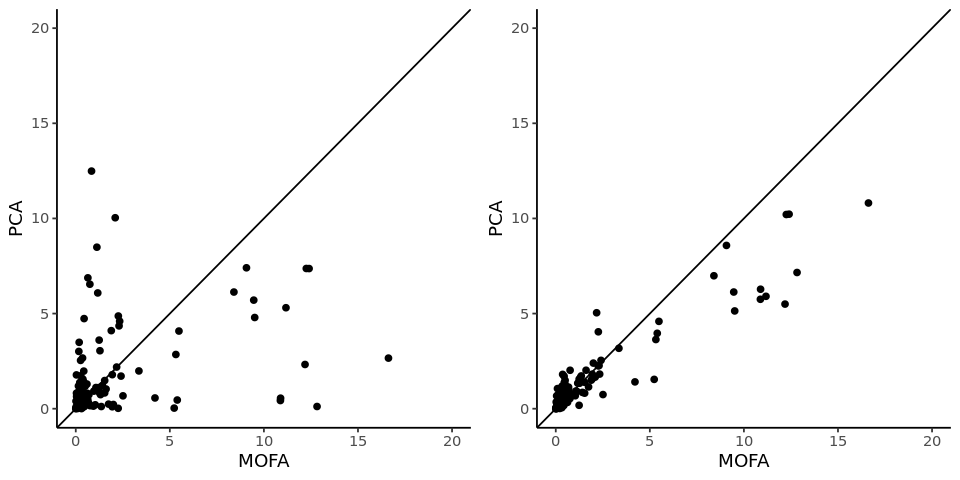

In [578]:
options(repr.plot.width = 8, repr.plot.height = 4)
p0 = ggplot(df0, aes(x=-log10(pv_raw.m), y=-log10(pv_raw.p))) + geom_point() + theme_classic() + geom_abline()
p0 = p0 + xlab("MOFA") + ylab("PCA") + xlim(c(0,20)) + ylim(c(0,20))
p1 = ggplot(df1, aes(x=-log10(pv_raw.m), y=-log10(pv_raw.p))) + geom_point() + theme_classic() + geom_abline()
p1 = p1 + xlab("MOFA") + ylab("PCA") + xlim(c(0,20)) + ylim(c(0,20))
plot_grid(p0,p1,ncol=2)

In [579]:
##### LDVAE

In [580]:
# to plot in R

## MOFA (pv2)
x = c(8.465845e-10,  2.912894e-02, 3.468064e-10,  0.005462, 0.348159, 0.092094, 0.018068, 0.202231, 0.375638, 
     0.720105, 0.471773, 3.969373e-13, 5.576247e-13, 0.208862, 0.656033, 0.353284, 0.006725, 0.888190, 0.000003, 
     0.011491, 1.328878e-11, 6.727592e-12, 0.436182, 0.686520, 2.398976e-17,  1.300539e-11, 3.080535e-10, 
     3.930914e-09, 0.318595, 0.057419, 0.011458, 0.914385, 0.971026, 0.057087, 0.038254, 0.000005, 0.419376, 
     0.145234, 0.25096, 0.051724, 0.004639, 0.012965, 0.945293, 0.434565, 0.469355, 0.791156, 0.526272, 0.024513,
     0.048411, 0.216436, 0.084545, 0.809697, 0.991218, 0.355933, 0.003093, 0.044061, 0.054433, 0.578994, 0.769611,
     0.17282, 0.000441, 0.586653, 0.237216)

## LDVAE same settings (pv1)
y0 = c(1.103523e-07, 9.014011e-02, 0.000746, 0.000141, 0.316305, 0.015920, 0.004250, 0.113659, 0.258806, 0.342259,
      0.169668, 1.945436e-11, 8.723618e-12, 0.000201, 0.307953, 0.033377, 0.000003, 0.775450, 0.075479, 0.461629,
      0.034528, 0.000027, 0.175667, 0.440837, 2.674606e-07, 0.000772, 0.000173, 0.066520, 0.129119, 0.020621,
      0.003417, 0.647512, 0.454538, 0.137590, 2.631526e-03, 6.865877e-07, 0.047961, 0.147208, 0.036225, 1.186653e-05,
      5.246980e-08, 4.611934e-08, 0.593706, 0.026581, 0.312531, 0.392848, 0.482856, 0.000055, 0.406865, 0.449668,
      0.086945, 0.231502, 0.957537, 0.635569, 0.230927, 0.281954, 0.000331, 0.385409, 0.038905, 0.010509, 0.000105,
      0.530046, 0.074441)

## LDVAE new settings (pv3)
y1 = c(1.913650e-07, 1.247358e-01, 0.000003, 0.000080, 0.266093, 0.063700, 0.010664, 0.105129, 0.452147, 0.622567,
      0.656348, 2.010416e-14, 2.503091e-15, 0.000036, 0.395675, 0.010078, 0.000001, 0.810282,  0.179800, 0.810958,
      0.011071, 0.000676, 0.035383, 0.225566, 4.862919e-08, 0.000266, 0.000696, 0.008577, 0.11841, 0.129038,
      0.00625, 0.510671, 0.407241, 0.032559, 0.005250, 0.000002, 0.230244, 0.22723, 0.031836, 4.559174e-05, 
      2.879162e-07, 1.446790e-07, 0.747629, 0.044543, 0.385746, 0.531140, 0.408399, 0.000131, 0.113757, 0.714947,
      0.061481, 0.704404, 0.898263, 0.638391, 0.078361, 0.108279, 0.000675, 0.817515, 0.048619, 0.008281, 0.000228,
      0.582644, 0.169477)

In [581]:
df_plot = data.frame(x=x, y0=y0, y1=y1)

In [582]:
cor.test(x,y0)
cor.test(-log10(x),-log10(y0))


	Pearson's product-moment correlation

data:  x and y0
t = 8.5033, df = 61, p-value = 6.016e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5978024 0.8323632
sample estimates:
      cor 
0.7364835 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y0)
t = 6.6383, df = 61, p-value = 9.658e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4762856 0.7715837
sample estimates:
      cor 
0.6476263 


In [583]:
cor.test(x,y1)
cor.test(-log10(x),-log10(y1))


	Pearson's product-moment correlation

data:  x and y1
t = 8.2237, df = 61, p-value = 1.814e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5818713 0.8247037
sample estimates:
      cor 
0.7251005 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y1)
t = 7.3045, df = 61, p-value = 6.938e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5239742 0.7960968
sample estimates:
      cor 
0.6830624 


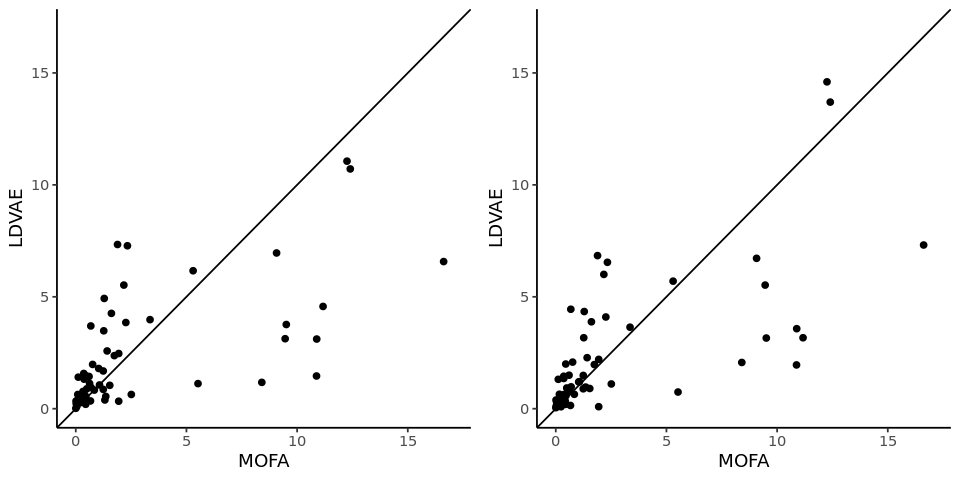

In [584]:
options(repr.plot.width = 8, repr.plot.height = 4)
p0 = ggplot(df_plot, aes(x=-log10(x), y=-log10(y0))) + geom_point() + theme_classic() + geom_abline()
p0 = p0 + xlab("MOFA") + ylab("LDVAE") + xlim(c(0,17)) + ylim(c(0,17))
p1 = ggplot(df_plot, aes(x=-log10(x), y=-log10(y1))) + geom_point() + theme_classic() + geom_abline()
p1 = p1 + xlab("MOFA") + ylab("LDVAE") + xlim(c(0,17)) + ylim(c(0,17))
plot_grid(p0,p1,ncol=2)

In [589]:
ld_filename = paste0(endo_folder,"REVISION/CRM_int_LDVAE/summary_new.csv")
ld = read.csv(ld_filename)
ld$snpID = ld$variant
ld$pv_raw = ld$pv
ld$gene_name = ld$gene
ld$gene = gsub("_.*","",ld$gene)
ld$X <- c()
head(ld,2)
nrow(ld)

chrom,gene,pv,variant,snpID,pv_raw,gene_name
22,ENSG00000100058,1.913650e-07,22_25845855_C_G,22_25845855_C_G,1.913650e-07,ENSG00000100058_CRYBB2P1
22,ENSG00000100058,1.247358e-01,22_25924999_G_A,22_25924999_G_A,1.247358e-01,ENSG00000100058_CRYBB2P1


[1] 121

In [590]:
df2 = inner_join(mofa, ld, by=c("snpID","gene"), suffix=c(".m",".l"))

In [591]:
x = df2$pv_raw.m
y1 = df2$pv_raw.l
cor.test(x,y1)
cor.test(-log10(x),-log10(y1))


	Pearson's product-moment correlation

data:  x and y1
t = 10.538, df = 119, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5893611 0.7769168
sample estimates:
      cor 
0.6947687 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y1)
t = 12.199, df = 119, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6539532 0.8154330
sample estimates:
      cor 
0.7454361 


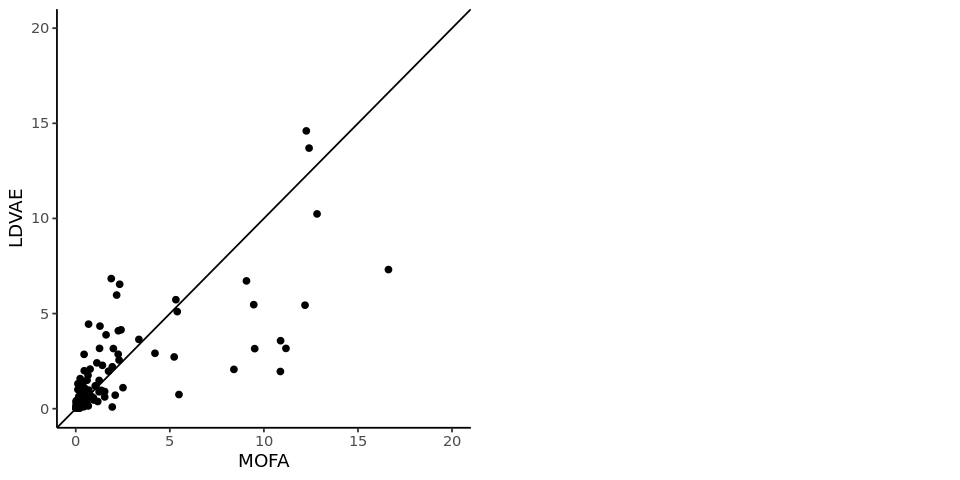

In [592]:
options(repr.plot.width = 8, repr.plot.height = 4)
p1 = ggplot(df2, aes(x=-log10(pv_raw.m), y=-log10(pv_raw.l))) + geom_point() + theme_classic() + geom_abline()
p1 = p1 + xlab("MOFA") + ylab("LDVAE") + xlim(c(0,20)) + ylim(c(0,20))
plot_grid(p1,ncol=2)

In [134]:
##### ZINB-WaVE

In [543]:
## MOFA (pv2)
x = c(8.465845e-10,  2.912894e-02, 3.468064e-10,  0.005462, 0.348159, 0.092094, 0.018068, 0.202231, 0.375638, 
     0.720105, 0.471773, 3.969373e-13, 5.576247e-13, 0.208862, 0.656033, 0.353284, 0.006725, 0.888190, 0.000003, 
     0.011491, 1.328878e-11, 6.727592e-12, 0.436182, 0.686520, 2.398976e-17,  1.300539e-11, 3.080535e-10, 
     3.930914e-09, 0.318595, 0.057419, 0.011458, 0.914385, 0.971026, 0.057087, 0.038254, 0.000005, 0.419376, 
     0.145234, 0.25096, 0.051724, 0.004639, 0.012965, 0.945293, 0.434565, 0.469355, 0.791156, 0.526272, 0.024513,
     0.048411, 0.216436, 0.084545, 0.809697, 0.991218, 0.355933, 0.003093, 0.044061, 0.054433, 0.578994, 0.769611,
     0.17282, 0.000441)

In [544]:
## ZINB-WaVE (20) same settings (pv1)
y0 = c(0.000227, 0.000299, 0.004444, 0.006490, 0.315256, 0.270620, 0.194964, 0.333722, 0.433283, 0.545358, 0.831145,
      2.684268e-07, 2.689159e-07, 0.402423, 0.878783, 0.770453, 0.000496, 0.245226, 0.070487, 0.877384, 0.000024,
      0.000013, 0.351221, 0.537747, 0.000225, 0.000029, 0.000025, 0.000201, 0.000935, 0.18262, 0.021111, 0.808823,
      0.784699, 0.354695, 0.170865, 0.003174, 0.701643, 0.565284, 0.467319, 0.366870, 0.020229, 0.048811, 0.763713,
      0.142629, 0.364347, 0.726821, 0.624041, 0.15496, 0.649026, 0.215196, 0.076395, 0.935941, 0.983358, 0.266280,
      0.796516, 0.162803, 0.000059, 0.115069, 0.439986, 0.022949, 0.063008)

## ZINB-WaVE (20) new settings (pv3)
y1 = c(0.001059, 0.001897, 0.000075, 0.000045, 0.101570, 0.317662, 0.212744, 0.407638, 0.557635, 0.771609, 0.735114,
      1.992701e-11, 3.494003e-12, 0.414160, 0.863323, 0.564085, 0.000002, 0.225704, 0.194276, 0.967329, 1.989394e-07,
      6.179765e-08, 0.068333, 0.203602, 2.605026e-10, 1.923257e-07, 1.171127e-07, 5.588892e-06, 0.143517, 0.293951,
      0.026693, 0.818519, 0.901275, 0.118308, 0.067169, 0.000285, 0.589111, 0.489782, 0.498673, 0.221865, 0.013717,
      0.022491, 0.726095, 0.458399, 0.885852, 0.885249, 0.600231, 0.052728, 0.177331, 0.163608, 0.044456, 0.440138,
      0.993593, 0.581501, 0.452328, 0.025204, 0.004506, 0.592068, 0.496698, 0.00277, 0.016651)

In [545]:
df_plot = data.frame(x=x, y0=y0, y1=y1)

In [546]:
cor.test(x,y0)
cor.test(-log10(x),-log10(y0))


	Pearson's product-moment correlation

data:  x and y0
t = 7.1728, df = 59, p-value = 1.379e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5200727 0.7972979
sample estimates:
      cor 
0.6825086 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y0)
t = 11.361, df = 59, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7285888 0.8937832
sample estimates:
      cor 
0.8284168 


In [547]:
cor.test(x,y1)
cor.test(-log10(x),-log10(y1))


	Pearson's product-moment correlation

data:  x and y1
t = 8.3317, df = 59, p-value = 1.507e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5932424 0.8328495
sample estimates:
      cor 
0.7352271 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y1)
t = 16.239, df = 59, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8443678 0.9414790
sample estimates:
      cor 
0.9039766 


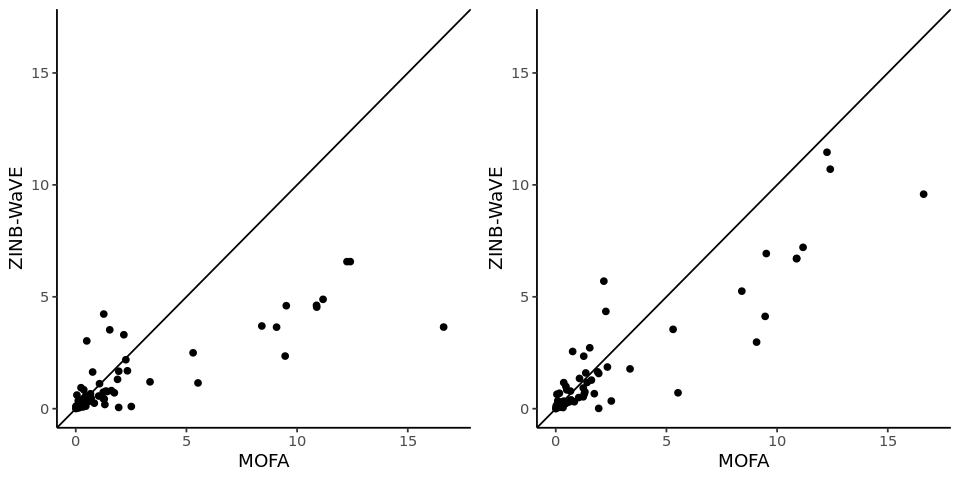

In [548]:
options(repr.plot.width = 8, repr.plot.height = 4)
p0 = ggplot(df_plot, aes(x=-log10(x), y=-log10(y0))) + geom_point() + theme_classic() + geom_abline()
p0 = p0 + xlab("MOFA") + ylab("ZINB-WaVE") + xlim(c(0,17)) + ylim(c(0,17))
p1 = ggplot(df_plot, aes(x=-log10(x), y=-log10(y1))) + geom_point() + theme_classic() + geom_abline()
p1 = p1 + xlab("MOFA") + ylab("ZINB-WaVE") + xlim(c(0,17)) + ylim(c(0,17))
plot_grid(p0,p1,ncol=2)

In [549]:
zw_filename = paste0(endo_folder,"REVISION/CRM_int_ZINB-WaVE/summary_new.csv")
zw = read.csv(zw_filename)
zw$snpID = zw$variant
zw$pv_raw = zw$pv
zw$gene_name = zw$gene
zw$gene = gsub("_.*","",zw$gene)
zw$X <- c()
head(zw,2)
nrow(zw)

chrom,gene,pv,variant,snpID,pv_raw,gene_name
22,ENSG00000100058,0.001058924,22_25845855_C_G,22_25845855_C_G,0.001058924,ENSG00000100058_CRYBB2P1
22,ENSG00000100058,0.001896708,22_25924999_G_A,22_25924999_G_A,0.001896708,ENSG00000100058_CRYBB2P1


[1] 121

In [550]:
df1 = inner_join(mofa, zw, by=c("snpID","gene"), suffix=c(".m",".z"))

In [551]:
x = df1$pv_raw.m
y1 = df1$pv_raw.z
cor.test(x,y1)
cor.test(-log10(x),-log10(y1))


	Pearson's product-moment correlation

data:  x and y1
t = 10.31, df = 119, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5794064 0.7708533
sample estimates:
      cor 
0.6868658 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y1)
t = 22.26, df = 119, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8568045 0.9277599
sample estimates:
      cor 
0.8979687 


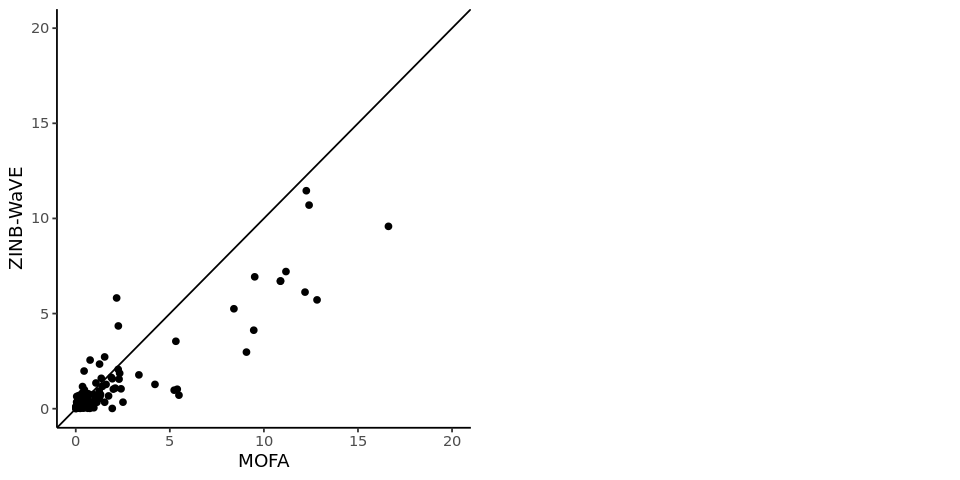

In [552]:
options(repr.plot.width = 8, repr.plot.height = 4)
p1 = ggplot(df1, aes(x=-log10(pv_raw.m), y=-log10(pv_raw.z))) + geom_point() + theme_classic() + geom_abline()
p1 = p1 + xlab("MOFA") + ylab("ZINB-WaVE") + xlim(c(0,20)) + ylim(c(0,20))
plot_grid(p1,ncol=2)